
# 2 Exploratory Data Analysis
---

## 2.1 Contents <a id='2.1_Contents'></a>
- [2.1 Contents](#2.1_Contents)
- [2.2 Introduction](#2.2_Introduction)
- [2.3 Imports](#2.3_Imports)
- [2.4 Load The Data](#2.4_Load_The_Data)
    - [2.4.1 Crime Data](#2.4.1_Crime_Data)
    - [2.4.2 Categorical Features](#2.4.2_Categorical_Features)
        - [2.4.2.1. Exploring: 'Date Reported' & 'Date Occurred'](#Exploring:_Date_Reported_&_Date_Occurred)
    - [2.4.3 Numerical Features](#2.4.3_Numerical_Features) 
- [2.5 Data Exploration](#2.5_Data_Exploration)
    - [2.5.1 Develop and explore hypotheses and investigation themes](#2.5.1_hypotheses_and_investigation)
        - [2.5.1.1 Area Name & Reporting Districts](#2.5.1.1_Area_Name_&_Reporting_Districts)
        - [2.5.1.2 Date Reported, Date Occurred, and Time Occurred](#2.5.1.2_Date_Reported_Date_Occurred_and_Time)
        - [2.5.1.3 A closer look at Victim Sex](#2.5.1.3_A_closer_look_at_Victim_Sex)
- [2.6 Interactions between variables](#2.6_Interactions_between_variables)
- [2.7 Summary](#2.7_Summary)


## 2.2 Introduction

#### Purpose:
This is a continuation of [1.0-faa-data-wrangling-initial-exploration-cleaning.ipynb](https://github.com/OCD0505/Springboard-Capstone-Project-Two/blob/37ac45f3f9b4d6bc430e612a448dbd0b0e5be629/notebooks/1.0-faa-data-wrangling-initial-exploration-cleaning%20.ipynb) focusing on understanding the relationship between data and features before moving onto modeling. 

Goal: Explore the data relationships of all your features and understand how the features compare to the response variable.

### **Problem Statement:**
The purpose of this data science project involves predicting the age and sex of individuals who become victims of crime using crime data and potentially other relevant variables. By analyzing patterns within crime data, we aim to develop predictive models that estimate the age and sex of victims, which can have applications in law enforcement, victim support and aid victim service providers target relevant areas. 


## 2.3 Imports <a id='2.3_Imports'></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy import stats
from math import trunc
import os

## 2.4 Load The Data <a id='2.4_Load_The_Data'></a>

In [4]:
# Storing file path in variable and then using pd.read_csv() to load the data as a dataframe into crimeData

dataFilePath = "/Users/frankyaraujo/Development/Springboard_Main/Capstone Two/\
Springboard-Capstone-Two/src/data/interim/2010-2023 Crime_Traffic_Collisions_Data_R1 .csv"
crimeDataAdj = pd.read_csv(dataFilePath, low_memory = False)

### 2.4.1 The Crime Data <a id='2.4.1_Crime_Data'></a>

In [5]:
crimeDataAdj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375881 entries, 0 to 1375880
Data columns (total 29 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Unnamed: 0.1            1375881 non-null  int64  
 1   Unnamed: 0              1375881 non-null  int64  
 2   DR Number               1375881 non-null  int64  
 3   Date Reported           1375881 non-null  object 
 4   Date Occurred           1375881 non-null  object 
 5   Time Occurred           1375881 non-null  int64  
 6   Area ID                 1375881 non-null  int64  
 7   Area Name               1375881 non-null  object 
 8   Reporting District      1375881 non-null  int64  
 9   Crime Code              1375881 non-null  int64  
 10  Crime Code Description  1375881 non-null  object 
 11  MO Codes                1181546 non-null  object 
 12  Victim Age              1099314 non-null  float64
 13  Victim Sex              1375881 non-null  object 
 14  Vi

In [6]:
crimeDataAdj.head()

,Unnamed: 0.1,Unnamed: 0,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,Address,Cross Street,LAT,LON
0,0,0,10304468,2020-01-08,2020-01-08,2230,3,Southwest,377,624,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,1,1,190101086,2020-01-02,2020-01-01,330,1,Central,163,624,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,2,2,200110444,2020-04-14,2020-02-13,1200,1,Central,155,845,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,3,3,191501505,2020-01-01,2020-01-01,1730,15,N Hollywood,1543,745,...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,4,4,191921269,2020-01-01,2020-01-01,415,19,Mission,1998,740,...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [7]:
# remove duplicate columns 'Unnamed: 0.1' and 'Unnamed: 0' since they are equivalent to the index

crimeDataAdj = crimeDataAdj.loc[:,"DR Number":"LON"]
crimeDataAdj.head(2)

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,Address,Cross Street,LAT,LON
0,10304468,2020-01-08,2020-01-08,2230,3,Southwest,377,624,BATTERY - SIMPLE ASSAULT,0444 0913,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,2020-01-02,2020-01-01,330,1,Central,163,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545


### 2.4.2 Categorical Features <a id='2.4.2_Categorical_Features'></a>

In [8]:
crimeDataAdjCat = crimeDataAdj.select_dtypes('object')
crimeDataAdjCat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375881 entries, 0 to 1375880
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype 
---  ------                  --------------    ----- 
 0   Date Reported           1375881 non-null  object
 1   Date Occurred           1375881 non-null  object
 2   Area Name               1375881 non-null  object
 3   Crime Code Description  1375881 non-null  object
 4   MO Codes                1181546 non-null  object
 5   Victim Sex              1375881 non-null  object
 6   Victim Descent          1375881 non-null  object
 7   Premise Description     1374460 non-null  object
 8   Weapon Desc             271192 non-null   object
 9   Status                  779803 non-null   object
 10  Status Desc             779803 non-null   object
 11  Address                 1375881 non-null  object
 12  Cross Street            692955 non-null   object
dtypes: object(13)
memory usage: 136.5+ MB


In [9]:
crimeDataAdjCat.describe()

,Date Reported,Date Occurred,Area Name,Crime Code Description,MO Codes,Victim Sex,Victim Descent,Premise Description,Weapon Desc,Status,Status Desc,Address,Cross Street
count,1375881,1375881,1375881,1375881,1181546,1375881,1375881,1374460,271192,779803,779803,1375881,692955
unique,4979,4979,21,139,370931,3,19,307,79,6,6,71414,22588
top,2022-05-02,2020-01-01,77th Street,TRAFFIC COLLISION,0344,M,Hispanic/Latin/Mexican,STREET,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,WESTERN AV,FIGUEROA ST
freq,978,1213,89250,596078,32204,672646,463505,763955,145585,624160,624160,8858,5827


'Date Reported' and 'Date Occured' may fit better as a numerical feature should it be decided to use these as explanatory variables in the predictive model later on. Let's take a look at these variables to determine whether they should be treated as categorical or numerical. 

**2.4.2.1. Exploring: 'Date Reported'	& 'Date Occurred'** <a id='Exploring:_Date_Reported_&_Date_Occurred'></a>

In [10]:
# subset te dataframe to explore only the date columns 
crimeDates = crimeDataAdjCat.loc[:,"Date Reported":"Date Occurred"]
                

In [11]:
# convert to datetime to analyze 
crimeDates_converted = crimeDates.apply(lambda x: x.map(lambda y: datetime.strptime(y,'%Y-%m-%d')))

In [12]:
crimeDates_converted.describe(datetime_is_numeric=False)

/var/folders/l1/kpr_34xn51ndl39jn5r_rqn00000gn/T/ipykernel_84550/3062286867.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  crimeDates_converted.describe(datetime_is_numeric=False)
/var/folders/l1/kpr_34xn51ndl39jn5r_rqn00000gn/T/ipykernel_84550/3062286867.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  crimeDates_converted.describe(datetime_is_numeric=False)


,Date Reported,Date Occurred
count,1375881,1375881
unique,4979,4979
top,2022-05-02 00:00:00,2020-01-01 00:00:00
freq,978,1213
first,2010-01-01 00:00:00,2010-01-01 00:00:00
last,2023-08-19 00:00:00,2023-08-19 00:00:00


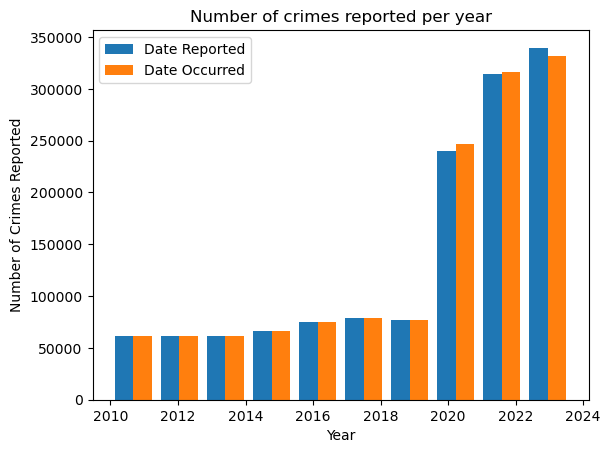

In [13]:
_=plt.hist(crimeDates_converted)
_=plt.xlabel("Year")
_=plt.ylabel("Number of Crimes Reported")
_=plt.legend(crimeDates_converted.columns)
_=plt.title("Number of crimes reported per year")

It appears that insights can be drawn from treating the dates as datetime objects. These columns will be added to the numberical features subset below and removed from the categorical variable created above for a clear distinction between categorical and numerical. 

In [14]:
# subsetted dataframe to remove date columns 

crimeDataAdjCat = crimeDataAdjCat.loc[:,"Area Name":]

In [15]:
crimeDataAdjCat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375881 entries, 0 to 1375880
Data columns (total 11 columns):
 #   Column                  Non-Null Count    Dtype 
---  ------                  --------------    ----- 
 0   Area Name               1375881 non-null  object
 1   Crime Code Description  1375881 non-null  object
 2   MO Codes                1181546 non-null  object
 3   Victim Sex              1375881 non-null  object
 4   Victim Descent          1375881 non-null  object
 5   Premise Description     1374460 non-null  object
 6   Weapon Desc             271192 non-null   object
 7   Status                  779803 non-null   object
 8   Status Desc             779803 non-null   object
 9   Address                 1375881 non-null  object
 10  Cross Street            692955 non-null   object
dtypes: object(11)
memory usage: 115.5+ MB


### 2.4.3 Numerical Features <a id='2.4.3_Numerical_Features'></a>

In [16]:
# storing numerical variables in a new dataframe to analyze 

crimeDataAdjNum = crimeDataAdj.select_dtypes(exclude='object')

In [17]:
# Adding the date columns to the dataframe of numerical objects 

crimeDataAdjNum = crimeDataAdj.loc[:,"DR Number":"Date Occurred"].merge(crimeDataAdjNum,on="DR Number", how='left')
crimeDataAdjNum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1376083 entries, 0 to 1376082
Data columns (total 16 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   DR Number           1376083 non-null  int64  
 1   Date Reported       1376083 non-null  object 
 2   Date Occurred       1376083 non-null  object 
 3   Time Occurred       1376083 non-null  int64  
 4   Area ID             1376083 non-null  int64  
 5   Reporting District  1376083 non-null  int64  
 6   Crime Code          1376083 non-null  int64  
 7   Victim Age          1099431 non-null  float64
 8   Premise Code        1375115 non-null  float64
 9   Weapon Used Cd      271220 non-null   float64
 10  Crm Cd 1            779894 non-null   float64
 11  Crm Cd 2            57553 non-null    float64
 12  Crm Cd 3            1925 non-null     float64
 13  Crm Cd 4            58 non-null       float64
 14  LAT                 1376083 non-null  float64
 15  LON            

In [18]:
crimeDataAdjNum.describe()

,DR Number,Time Occurred,Area ID,Reporting District,Crime Code,Victim Age,Premise Code,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,1.376083e+06,1.376083e+06,1.376083e+06,1.376083e+06,1.376083e+06,1.099431e+06,1.375115e+06,271220.000000,779894.000000,57553.000000,1925.000000,58.000000,1.376083e+06,1.376083e+06
mean,1.905493e+08,1.343427e+03,1.087462e+01,1.133676e+03,7.157387e+02,4.038715e+01,2.177594e+02,362.676314,500.475992,957.455493,983.823896,990.500000,3.400192e+01,-1.180980e+02
std,3.721141e+07,6.322979e+02,6.002675e+00,6.007464e+02,2.914850e+02,1.606607e+01,1.923627e+02,123.713671,207.668472,111.571085,50.885829,28.359998,1.597988e+00,5.537763e+00
min,8.170000e+02,1.000000e+00,1.000000e+00,1.000000e+02,1.100000e+02,2.000000e+00,1.010000e+02,101.000000,110.000000,210.000000,434.000000,821.000000,0.000000e+00,-1.186676e+02
25%,1.703272e+08,9.120000e+02,6.000000e+00,6.430000e+02,4.400000e+02,2.800000e+01,1.010000e+02,309.000000,331.000000,998.000000,998.000000,998.000000,3.401480e+01,-1.184342e+02
50%,2.016153e+08,1.425000e+03,1.100000e+01,1.147000e+03,7.530000e+02,3.700000e+01,1.010000e+02,400.000000,442.000000,998.000000,998.000000,998.000000,3.406080e+01,-1.183279e+02
75%,2.205162e+08,1.835000e+03,1.600000e+01,1.636000e+03,9.970000e+02,5.100000e+01,4.010000e+02,400.000000,626.000000,998.000000,998.000000,998.000000,3.416860e+01,-1.182769e+02
max,2.399228e+08,2.359000e+03,2.100000e+01,2.199000e+03,9.970000e+02,9.900000e+01,9.740000e+02,516.000000,956.000000,999.000000,999.000000,999.000000,3.469200e+01,0.000000e+00


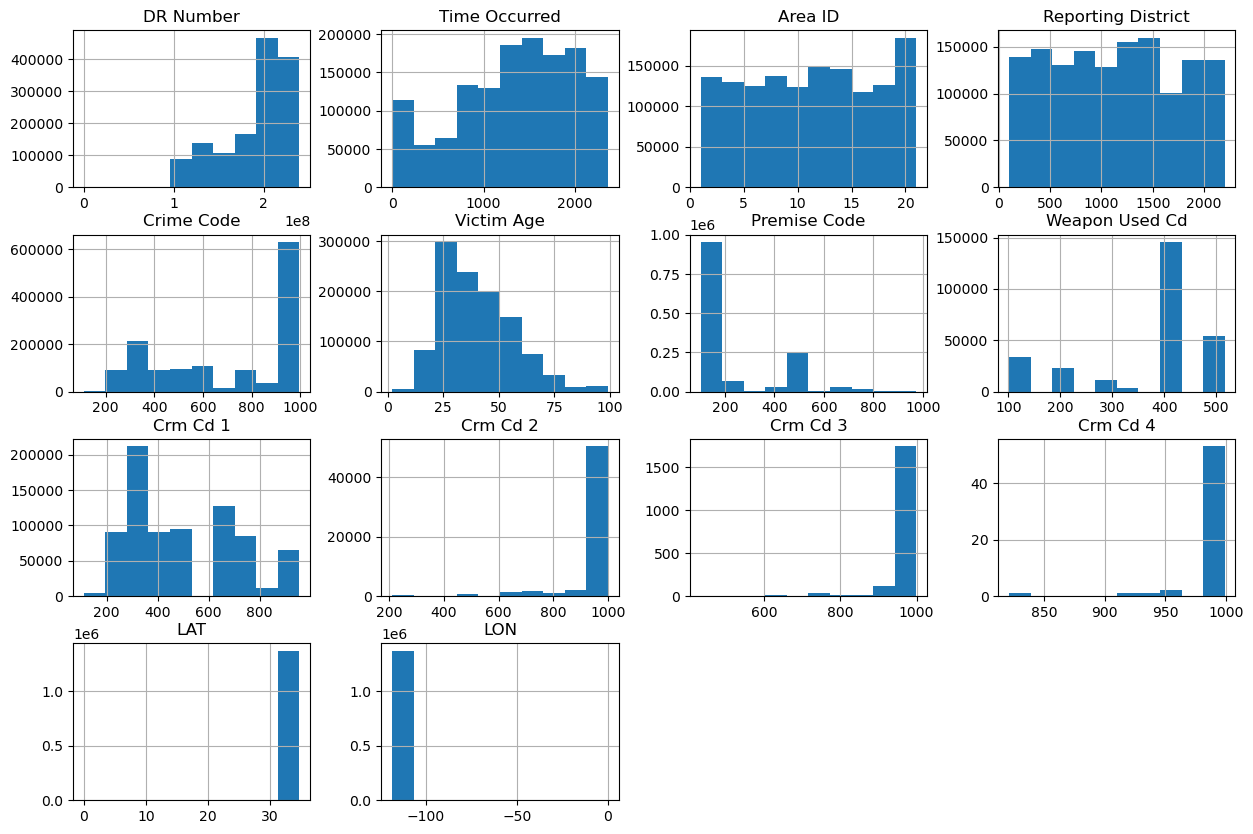

In [19]:
_=crimeDataAdjNum.hist(figsize=(15,10))

## 2.5 Data Exploration <a id=2.5_Data_Exploration></a>

Above was a quick review of variables and a slight revision to object types. More details on the characteristics of the categorical and numerical data can be found in the previous notebook [1.0-faa-data-wrangling-initial-exploration-cleaning](https://github.com/OCD0505/Springboard-Capstone-Project-Two/blob/2c62246d09f282e2a9051021c19725bcb6606b2e/notebooks/1.0-faa-data-wrangling-initial-exploration-cleaning%20.ipynb). This section will be compromised of, but not limited to, the following: 
- Developing and exploring hypotheses and investigation themes.
- Wrangling data (if needed).
- Assessing the quality of data.
- Creating profile data.
- Exploring each individual variable in the dataset.
- Assessing the relationship between each variable and the target.
- Assessing interactions between variables.
- Exploring data across many dimensions.

In [20]:
# Update dataset's date columns as was done in 2.4.2.a
crimeDataAdj['Date Reported'] = crimeDataAdj['Date Reported'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
crimeDataAdj['Date Occurred'] = crimeDataAdj['Date Occurred'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [21]:
# all variables are now set in the appropriate data type

crimeDataAdj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375881 entries, 0 to 1375880
Data columns (total 27 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   DR Number               1375881 non-null  int64         
 1   Date Reported           1375881 non-null  datetime64[ns]
 2   Date Occurred           1375881 non-null  datetime64[ns]
 3   Time Occurred           1375881 non-null  int64         
 4   Area ID                 1375881 non-null  int64         
 5   Area Name               1375881 non-null  object        
 6   Reporting District      1375881 non-null  int64         
 7   Crime Code              1375881 non-null  int64         
 8   Crime Code Description  1375881 non-null  object        
 9   MO Codes                1181546 non-null  object        
 10  Victim Age              1099314 non-null  float64       
 11  Victim Sex              1375881 non-null  object        
 12  Victim Descent

In [22]:
# create csv of cleaner dataset

'''
crimeDataAdj.to_csv("Springboard-Capstone-Two/
src/data/interim/2010-2023 Crime_Traffic_Collisions_Data_R2")
'''

'\ncrimeDataAdj.to_csv("Springboard-Capstone-Two/\nsrc/data/interim/2010-2023 Crime_Traffic_Collisions_Data_R2")\n'

### 2.5.1 Develop and explore hypotheses and investigation themes <a id=2.5.1_hypotheses_and_investigation></a>

In [23]:
crimeDataAdj.head(1)

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,Address,Cross Street,LAT,LON
0,10304468,2020-01-08,2020-01-08,2230,3,Southwest,377,624,BATTERY - SIMPLE ASSAULT,0444 0913,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978


- I believe time, date and location will be the features to review to find a trend and predict victim age and victim sex. If that is the case, then I believe each reporting district/area will show a distinction in the frequency and spread of victim age and victim sex.

**2.5.1.1 Area Name & Reporting Districts** <a id='2.5.1.1_Area_Name_&_Reporting_Districts'></a>

In [24]:
# Determine the unique number of areas to work with **Area Name & Reporting Districts**

print("Unique number of reporting districts: ",crimeDataAdj["Reporting District"].nunique())
print("Unique number of area names:", crimeDataAdj["Area Name"].nunique())
print("Unique number of area IDs:", crimeDataAdj["Area ID"].nunique()) 
# Should be same as the unique count of Area Names

Unique number of reporting districts:  1335
Unique number of area names: 21
Unique number of area IDs: 21


- Since the number of reporting districts is drastically different from the number of areas, lets see if there is a clear one-to-many relationship between areas and districts.

In [25]:
# Lets see if we can find the districts that correspond to each area 

crimeDataAdj.groupby("Area Name").agg({"Reporting District":["min","max"]}).\
    sort_values(by = ("Reporting District","min"))

Reporting District      
                           min   max
Area Name                           
Central                    100   195
Rampart                    200   299
Southwest                  300   399
Hollenbeck                 401   499
Harbor                     500   599
Hollywood                  600   699
Wilshire                   700   799
West LA                    800   899
Van Nuys                   900   998
West Valley               1000  1099
Northeast                 1100  1199
77th Street               1200  1293
Newton                    1300  1395
Pacific                   1400  1499
N Hollywood               1500  1599
Foothill                  1600  1699
Devonshire                1700  1799
Southeast                 1800  1891
Mission                   1900  1999
Olympic                   2000  2099
Topanga                   2100  2199

- It looks like there is a clear structure to the districts per area since there is no intersection between each range represented by the min and max of the reporting districts (ie none of the minimums of an area fall below the maximum of another area) Working with 21 areas sounds more reasonable since we'll look at 21 statistical metrics rather than 1335 should the district be used. 

In [26]:
crime_data_victim_age_mean_per_area = crimeDataAdj.groupby(["Area Name"]).agg({"Victim Age":"mean"})
crime_data_victim_age_mean_per_area.sort_values(by = "Victim Age", ascending = False)

,Victim Age
Area Name,
West Valley,42.991123
West LA,42.676194
Devonshire,42.638502
Topanga,42.177798
Northeast,41.586662
Van Nuys,41.584116
Pacific,41.432927
Foothill,41.230227
Harbor,41.136627


In [27]:
crime_data_victim_age_mean_per_area.mean()

Victim Age    40.481469
dtype: float64

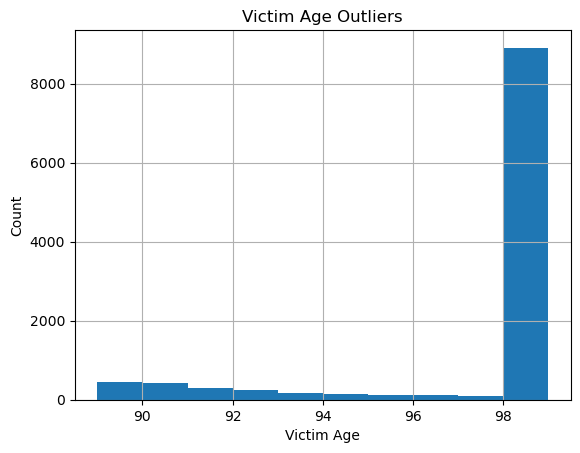

In [28]:
# See if outliers are affecting the mean
# find outliers above 3 standard deviations
zscores_victim_age = np.abs(stats.zscore(crimeDataAdj["Victim Age"].dropna()))

outliers = np.where(zscores_victim_age > 3)
_=crimeDataAdj["Victim Age"].dropna().iloc[outliers[0]].hist()
_=plt.xlabel("Victim Age")
_=plt.ylabel("Count")
_=plt.title("Victim Age Outliers")

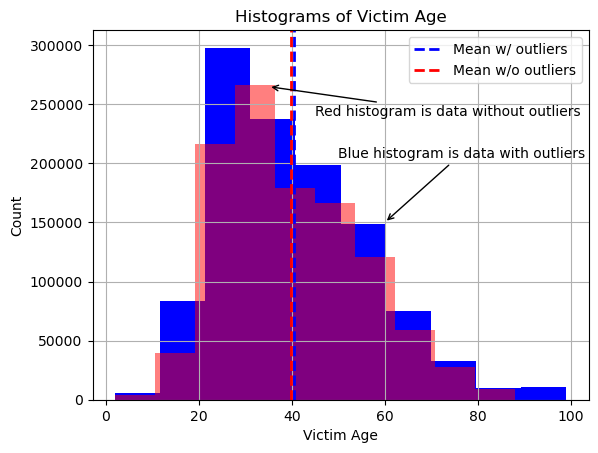

In [29]:
# Graph data with outliers and without oultiers to compare 

df_mask = crimeDataAdj["Victim Age"]<crimeDataAdj["Victim Age"].dropna().iloc[outliers[0]].min()
_=crimeDataAdj["Victim Age"].hist(color="blue")
_=plt.axvline(crimeDataAdj["Victim Age"].mean(), color="blue",linestyle='dashed', linewidth=2, label='Mean w/ outliers')
_=crimeDataAdj[df_mask]["Victim Age"].hist(alpha=.5, color="red")
_=plt.axvline(crimeDataAdj[df_mask]["Victim Age"].mean(), color="red",linestyle='dashed', linewidth=2, label='Mean w/o outliers')
_=plt.legend()
_=plt.title("Histograms of Victim Age")
_=plt.xlabel("Victim Age")
_=plt.ylabel("Count")
_=plt.annotate("Blue histogram is data with outliers",xy=(60,150000),xytext=(50,205000),\
               arrowprops=dict(arrowstyle="->"))
_=plt.annotate("Red histogram is data without outliers",xy=(35,265000),xytext=(45,240000),\
               arrowprops=dict(arrowstyle="->"))

- It looks like removing the outliers did not change the sample mean by very much and it was shown that each area has mean age between 38 and 40 years so the difference is minimal and can be ignored for now. Let's see if there is any difference if we would have looked at the reporting districts instead using a plot.  

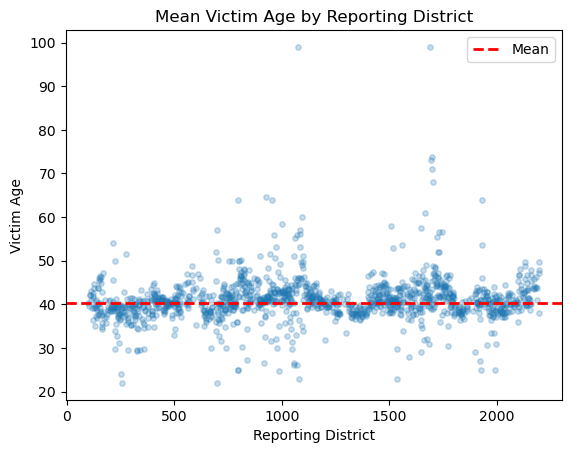

In [30]:
# scatterplot of victim age and reporting district 

_=crimeDataAdj.groupby("Reporting District").agg({"Victim Age":"mean"}).reset_index().\
                                        plot.scatter(x="Reporting District", y="Victim Age", s=15, alpha=.25)
_=plt.axhline(crimeDataAdj["Victim Age"].mean(), color="red",linestyle='dashed', linewidth=2, label='Mean')
_=plt.legend()
_=plt.title("Mean Victim Age by Reporting District")

- It appears to resemble the same distribution when looking at the districts which makes sense since this would be as if we took samples of the area name samples in which case we're looking at the means of the samples taken from the data grouped by area name (ie sample means represent the est. population mean)


Let's see if time/date will show any trend among victim ages and sex.

**2.5.1.2 Date Reported, Date Occurred, and Time Occurred** <a id='2.5.1.2_Date_Reported_Date_Occurred_and_Time'></a>

In [31]:
columns_dates_time_age_sex = ["Date Reported","Date Occurred","Time Occurred","Victim Age","Victim Sex"]
crimeDataAdj_date_time_age_sex = crimeDataAdj.loc[:,columns_dates_time_age_sex]
crimeDataAdj_date_time_age_sex.head()

,Date Reported,Date Occurred,Time Occurred,Victim Age,Victim Sex
0,2020-01-08,2020-01-08,2230,36.0,F
1,2020-01-02,2020-01-01,330,25.0,M
2,2020-04-14,2020-02-13,1200,NaN,X
3,2020-01-01,2020-01-01,1730,76.0,F
4,2020-01-01,2020-01-01,415,31.0,X


In [32]:
# convert the time so it is more readable by setting to a range between 0-24

crimeDataAdj_date_time_age_sex["Time Occurred"]=crimeDataAdj_date_time_age_sex["Time Occurred"].\
                                                                        apply(lambda x: x/100)

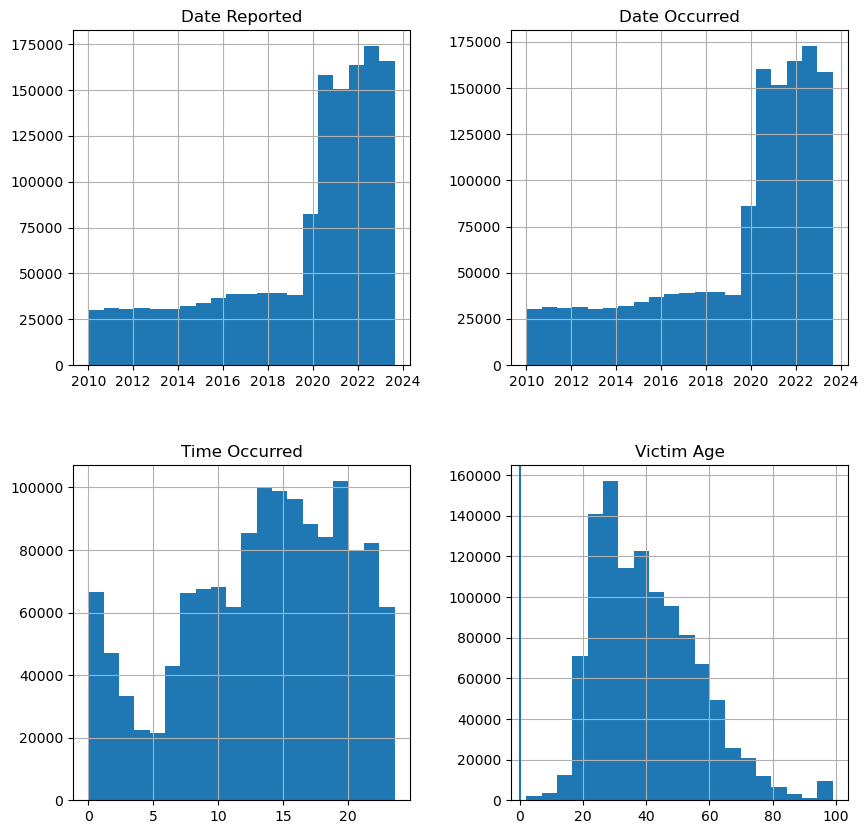

In [33]:
# look at the numerical histograms

_=crimeDataAdj_date_time_age_sex.hist(figsize=(10,10), bins=20)
_=plt.axvline()

- There seems to be an uptick in reports based on the date reported and date occured starting right before 2020. Covid-19 impacted the US in 2020 so that is a major event that should be noted for 2020-2022 as well as civil unrest, inflation, shortages, business closures, and so on. The histogram for time occurred shows most crimes tend to occur in the afternoon into the late evening and then drops off between 1AM - 4AM.

- Victim age was explored in the previous section when the area names and reporting districts were reviewed.

In [34]:
crimeDataAdj_date_time_age_sex['Year Occurred'] = crimeDataAdj_date_time_age_sex["Date Occurred"].\
                                                                                apply(lambda x: x.year)
crimeDataAdj_date_time_age_sex['Month Occurred'] =  pd.to_datetime(crimeDataAdj_date_time_age_sex["Date Occurred"]).\
                                            dt.strftime('%B')
crimeDataAdj_date_time_age_sex['Day of Week Occurred'] = pd.to_datetime(crimeDataAdj_date_time_age_sex["Date Occurred"]).\
                                            dt.strftime('%A')
crimeDataAdj_date_time_age_sex["Hour of Day Occurred"] = crimeDataAdj_date_time_age_sex['Time Occurred'].\
                                apply(lambda x: trunc(x))

In [35]:
crimeDataAdj_date_time_age_sex.head()

,Date Reported,Date Occurred,Time Occurred,Victim Age,Victim Sex,Year Occurred,Month Occurred,Day of Week Occurred,Hour of Day Occurred
0,2020-01-08,2020-01-08,22.30,36.0,F,2020,January,Wednesday,22
1,2020-01-02,2020-01-01,3.30,25.0,M,2020,January,Wednesday,3
2,2020-04-14,2020-02-13,12.00,NaN,X,2020,February,Thursday,12
3,2020-01-01,2020-01-01,17.30,76.0,F,2020,January,Wednesday,17
4,2020-01-01,2020-01-01,4.15,31.0,X,2020,January,Wednesday,4


In [36]:
crimeDataAdj_date_time_age_sex['Time of Day Occurred'] = crimeDataAdj_date_time_age_sex["Time Occurred"].apply(lambda x: "PM" if x>12 else "AM")

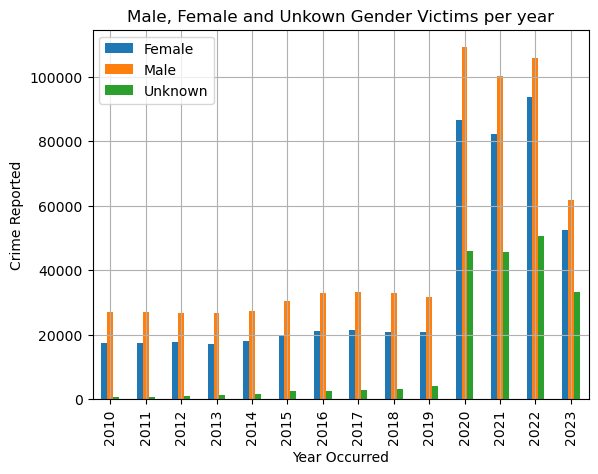

In [37]:
_=crimeDataAdj_date_time_age_sex.pivot_table(index='Year Occurred', columns='Victim Sex', \
                                           aggfunc='size', fill_value=0).plot(kind='bar', grid=True)
_=plt.ylabel("Crime Reported")
_=plt.legend(['Female','Male','Unknown'])
_=plt.title("Male, Female and Unkown Gender Victims per year")

- It was shown earlier that more Males were reported as crime victims than Females and individuals with unkown genders (per the crime report) and this chart also reflects that finding.



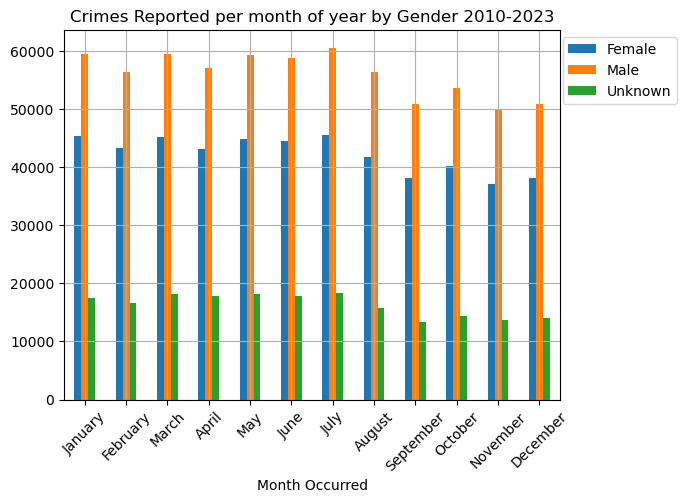

In [38]:
# create order since months are alphabetized
custom_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# re-order column and reaasign to DataFrame
crimeDataAdj_date_time_age_sex['Month Occurred'] = pd.Categorical(crimeDataAdj_date_time_age_sex['Month Occurred'],\
                                                                  categories=custom_order, ordered=True)

_=crimeDataAdj_date_time_age_sex.pivot_table(index='Month Occurred', columns='Victim Sex', \
                                           aggfunc='size', fill_value=0).plot(kind='bar', grid=True, rot=45)
_=plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1),labels=['Female','Male','Unknown'] )
_=plt.title("Crimes Reported per month of year by Gender 2010-2023")


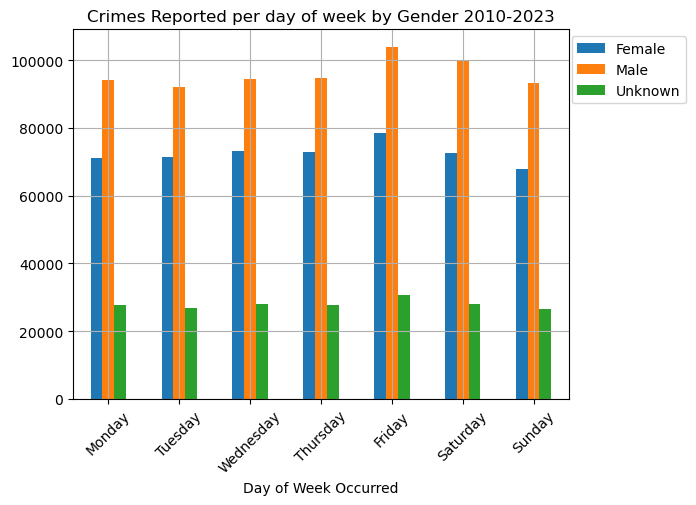

In [39]:
# similar to months above, reordered to show days of week in order
custom_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
crimeDataAdj_date_time_age_sex['Day of Week Occurred'] = pd.Categorical(crimeDataAdj_date_time_age_sex['Day of Week Occurred'], \
                                                                        categories=custom_order, ordered=True)

_=crimeDataAdj_date_time_age_sex.pivot_table(index='Day of Week Occurred', columns='Victim Sex', \
                                           aggfunc='size', fill_value=0).plot(kind='bar', grid=True, rot=45)
_=plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1),labels=['Female','Male','Unknown'] )
_=plt.title("Crimes Reported per day of week by Gender 2010-2023")


**2.5.1.3 A closer look at Victim Sex** <a id='2.5.1.3_A_closer_look_at_Victim_Sex'></a>

Let's look at the data by grouping by Victim Sex and see if there are trends on when the crimes occurred for each category.

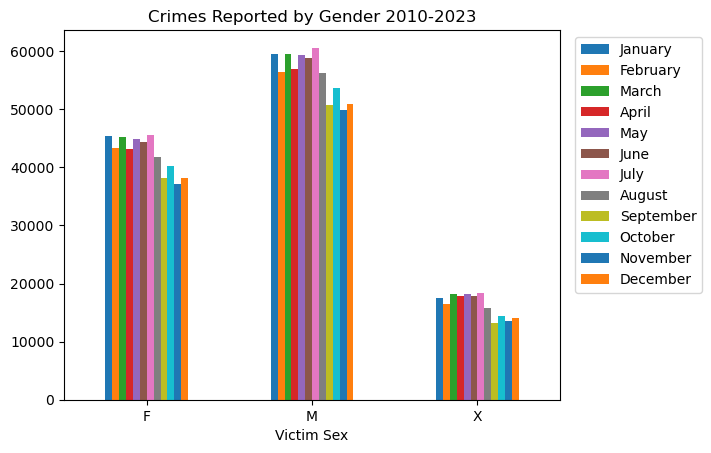

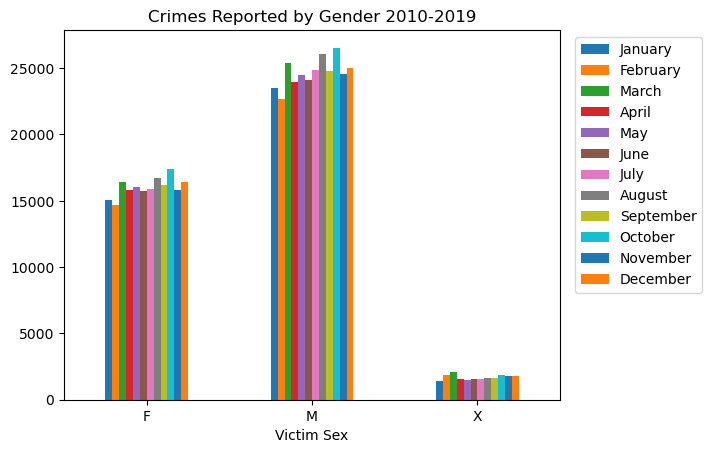

In [40]:
#Count of crimes per month by victim sex

_=crimeDataAdj_date_time_age_sex.pivot_table(index='Victim Sex', \
        columns=['Month Occurred'], aggfunc='size', fill_value=0).plot(kind='bar', rot=0)

_=plt.legend(loc='upper right', bbox_to_anchor=(1.30, 1))
_=plt.title("Crimes Reported by Gender 2010-2023")

# Before the drastic increase starting 2020 

boolean_mask=crimeDataAdj_date_time_age_sex['Year Occurred']<2020
_=crimeDataAdj_date_time_age_sex[boolean_mask].pivot_table(index='Victim Sex', \
        columns=['Month Occurred'], aggfunc='size', fill_value=0).plot(kind='bar', rot=0)
_=plt.legend(loc='upper right', bbox_to_anchor=(1.30, 1))
_=plt.title("Crimes Reported by Gender 2010-2019")


There appears to be a slight difference in the amount of crimes reported per month. It seems that including data from 2020 and on, the reported crimes shifted towards earlier in the year with a drop-off starting in August. 

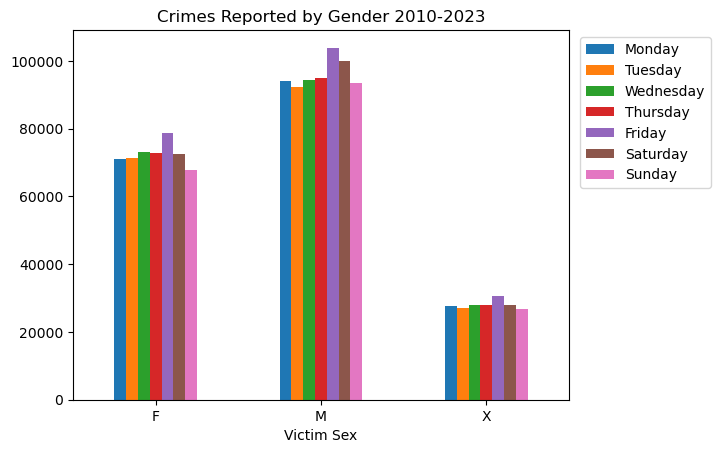

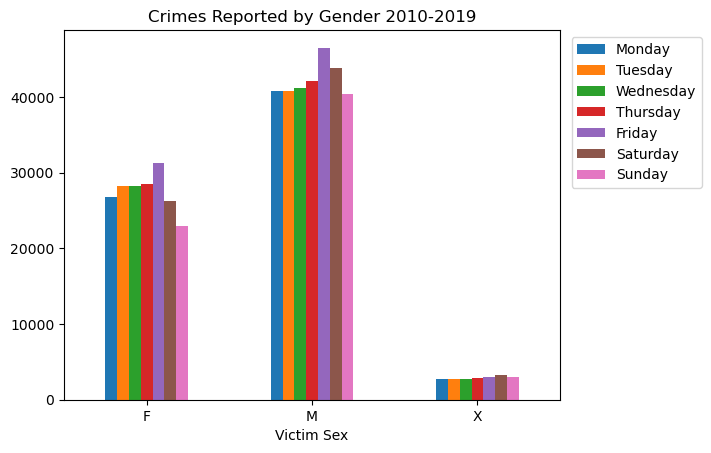

In [41]:
#Count of crimes per month by victim sex
_=crimeDataAdj_date_time_age_sex.pivot_table(index='Victim Sex', \
        columns=['Day of Week Occurred'], aggfunc='size', fill_value=0).plot(kind='bar', rot=0)

_=plt.legend(loc='upper right', bbox_to_anchor=(1.30, 1))
_=plt.title("Crimes Reported by Gender 2010-2023")

# Before the drastic increase starting 2020 

_=crimeDataAdj_date_time_age_sex[boolean_mask].pivot_table(index='Victim Sex', \
        columns=['Day of Week Occurred'], aggfunc='size', fill_value=0).plot(kind='bar', rot=0)
_=plt.legend(loc='upper right', bbox_to_anchor=(1.30, 1))
_=plt.title("Crimes Reported by Gender 2010-2019")

There does not seem to be a difference in the bar graphs when looking at data before 2020 but there does seeme to be an increase in unkown genders reported when looking at the data from 2010-2023. This would need to be looked at proportionally before determing whether it was a significant increase in unknown genders. 

### 2.6 Interactions between variables<a id=2.6_Interactions_between_variables></a>

In [42]:
#looking at the pearson coefficient between variables as is

crimeDataAdj.corr()

/var/folders/l1/kpr_34xn51ndl39jn5r_rqn00000gn/T/ipykernel_84550/2716385003.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  crimeDataAdj.corr()


,DR Number,Time Occurred,Area ID,Reporting District,Crime Code,Victim Age,Premise Code,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
DR Number,1.000000,-0.015237,-0.007178,-0.006985,-0.646442,-0.045439,0.407832,0.004546,-0.029083,0.028428,0.034041,0.124482,-0.012106,0.010828
Time Occurred,-0.015237,1.000000,0.005332,0.005438,0.020049,-0.018626,-0.051585,-0.005619,0.017554,0.002821,-0.004448,-0.020932,0.001110,-0.001046
Area ID,-0.007178,0.005332,1.000000,0.998996,0.025019,0.025546,-0.013239,-0.019978,-0.000089,-0.036400,0.035937,0.154033,0.022788,-0.007001
Reporting District,-0.006985,0.005438,0.998996,1.000000,0.024624,0.025643,-0.013049,-0.019665,-0.000175,-0.036765,0.035151,0.155577,0.022565,-0.006959
Crime Code,-0.646442,0.020049,0.025019,0.024624,1.000000,0.042762,-0.394991,0.375676,0.999296,0.002325,0.110329,0.044745,-0.003696,0.005008
Victim Age,-0.045439,-0.018626,0.025546,0.025643,0.042762,1.000000,-0.018568,0.065797,-0.003659,0.099089,-0.023894,0.020980,0.000334,0.000879
Premise Code,0.407832,-0.051585,-0.013239,-0.013049,-0.394991,-0.018568,1.000000,0.208560,0.102717,-0.057512,-0.029144,0.022474,-0.015709,0.015710
Weapon Used Cd,0.004546,-0.005619,-0.019978,-0.019665,0.375676,0.065797,0.208560,1.000000,0.376535,-0.151388,-0.078975,0.050085,-0.011018,0.013457
Crm Cd 1,-0.029083,0.017554,-0.000089,-0.000175,0.999296,-0.003659,0.102717,0.376535,1.000000,0.023730,0.159418,-0.029025,-0.043503,0.043585
Crm Cd 2,0.028428,0.002821,-0.036400,-0.036765,0.002325,0.099089,-0.057512,-0.151388,0.023730,1.000000,0.284313,0.035351,-0.016992,0.017849


In [43]:
#looking at the pearson coefficient between variables after encoding Victim Sex

pd.get_dummies(crimeDataAdj, columns=['Victim Sex'], prefix=['Victim Sex']).corr()

/var/folders/l1/kpr_34xn51ndl39jn5r_rqn00000gn/T/ipykernel_84550/1117258933.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pd.get_dummies(crimeDataAdj, columns=['Victim Sex'], prefix=['Victim Sex']).corr()


,DR Number,Time Occurred,Area ID,Reporting District,Crime Code,Victim Age,Premise Code,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON,Victim Sex_F,Victim Sex_M,Victim Sex_X
DR Number,1.000000,-0.015237,-0.007178,-0.006985,-0.646442,-0.045439,0.407832,0.004546,-0.029083,0.028428,0.034041,0.124482,-0.012106,0.010828,-0.015413,-0.132305,0.210590
Time Occurred,-0.015237,1.000000,0.005332,0.005438,0.020049,-0.018626,-0.051585,-0.005619,0.017554,0.002821,-0.004448,-0.020932,0.001110,-0.001046,-0.006411,-0.005295,0.016430
Area ID,-0.007178,0.005332,1.000000,0.998996,0.025019,0.025546,-0.013239,-0.019978,-0.000089,-0.036400,0.035937,0.154033,0.022788,-0.007001,0.015303,0.002589,-0.024838
Reporting District,-0.006985,0.005438,0.998996,1.000000,0.024624,0.025643,-0.013049,-0.019665,-0.000175,-0.036765,0.035151,0.155577,0.022565,-0.006959,0.015409,0.002292,-0.024560
Crime Code,-0.646442,0.020049,0.025019,0.024624,1.000000,0.042762,-0.394991,0.375676,0.999296,0.002325,0.110329,0.044745,-0.003696,0.005008,0.038885,0.102979,-0.201045
Victim Age,-0.045439,-0.018626,0.025546,0.025643,0.042762,1.000000,-0.018568,0.065797,-0.003659,0.099089,-0.023894,0.020980,0.000334,0.000879,-0.055294,0.075011,-0.084312
Premise Code,0.407832,-0.051585,-0.013239,-0.013049,-0.394991,-0.018568,1.000000,0.208560,0.102717,-0.057512,-0.029144,0.022474,-0.015709,0.015710,0.124178,-0.081661,-0.054656
Weapon Used Cd,0.004546,-0.005619,-0.019978,-0.019665,0.375676,0.065797,0.208560,1.000000,0.376535,-0.151388,-0.078975,0.050085,-0.011018,0.013457,0.178654,-0.158548,-0.041794
Crm Cd 1,-0.029083,0.017554,-0.000089,-0.000175,0.999296,-0.003659,0.102717,0.376535,1.000000,0.023730,0.159418,-0.029025,-0.043503,0.043585,0.097119,-0.104850,0.011589
Crm Cd 2,0.028428,0.002821,-0.036400,-0.036765,0.002325,0.099089,-0.057512,-0.151388,0.023730,1.000000,0.284313,0.035351,-0.016992,0.017849,-0.130897,0.059921,0.091487


At first glance, there is no sign of any significant correlation but let's confirm by using pairplot and/or heatmap.

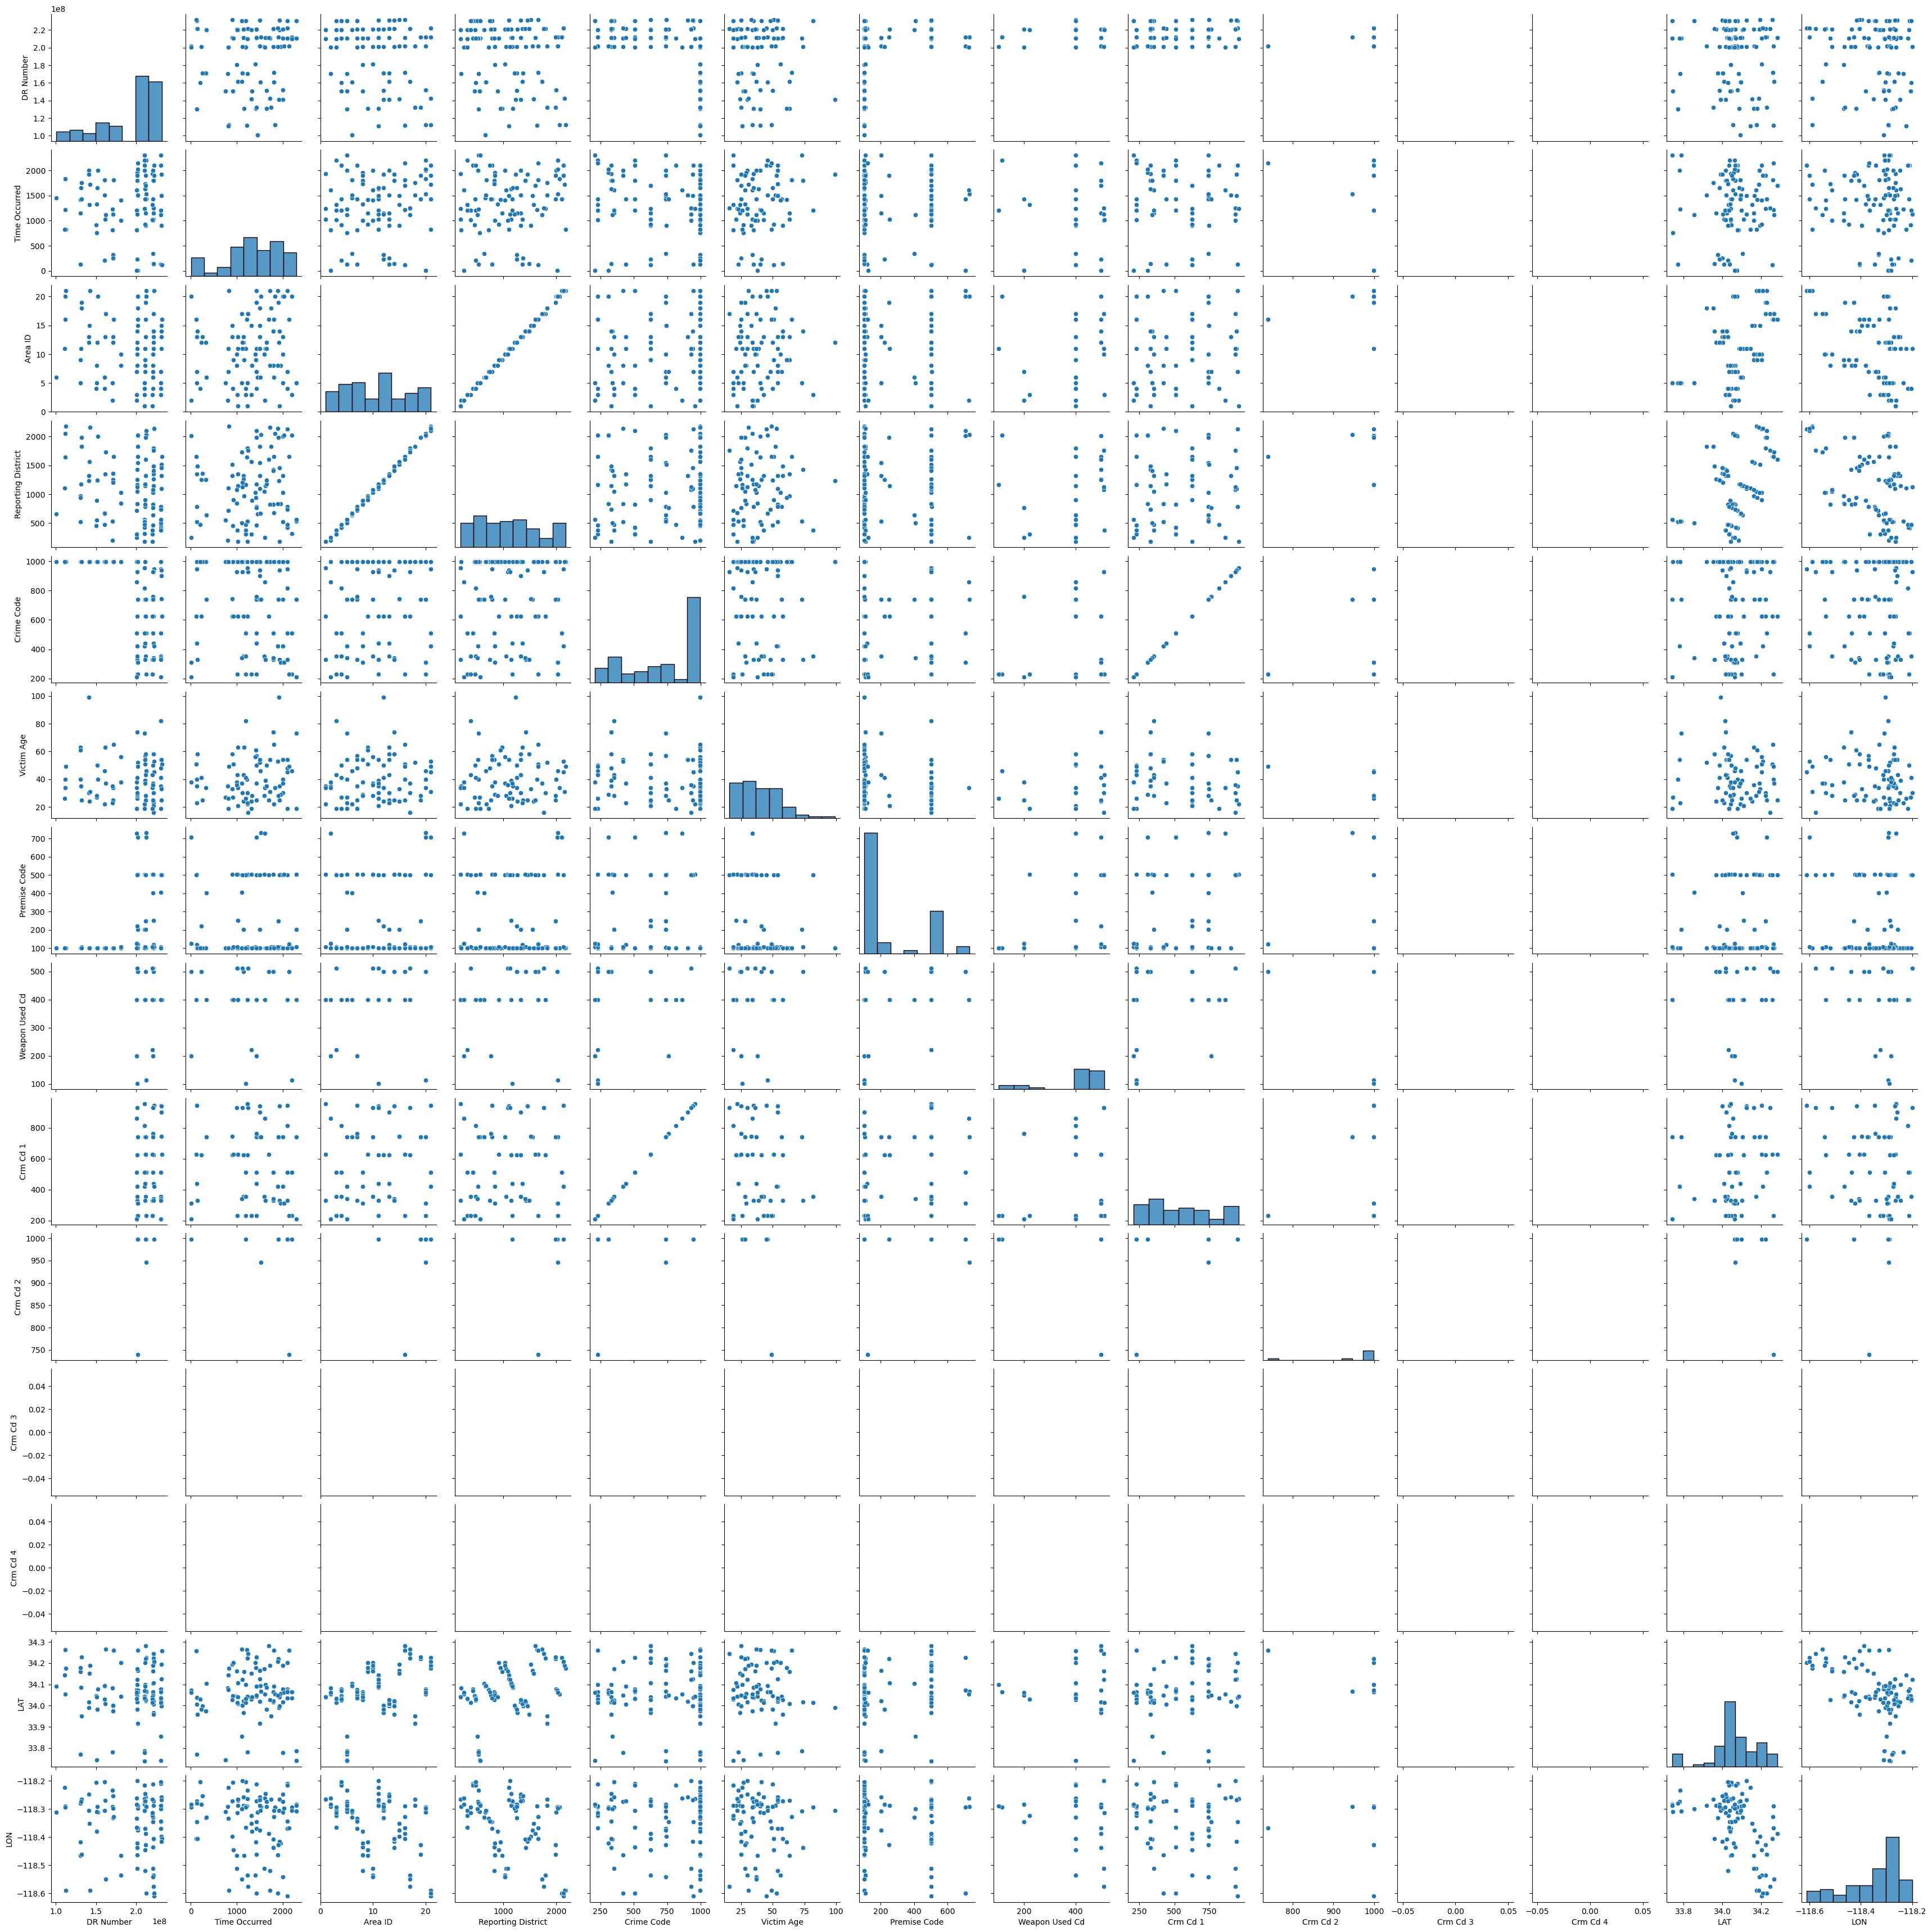

In [44]:
# A smaller sample size will be used for the pairplot to be more efficient

sns.pairplot(crimeDataAdj.sample(n=100, random_state=1))

The only strong correlation are between the obvious variables that are related - For example, between Area ID & Reporting District and Crime Code & Crm Cd1. This pairplot further supports that there is no strong in correlation between the variables of interest. 

This suggests the need for a more sophisticated approach to determine whether there is an underlying correlation. It also prompts consideration of whether variables should be reorganized as independent versus dependent, or if, in fact, there is no significant relationship between the variables and the observations are purely random.

### 2.7 Summary <a id='2.7_Summary'></a>



In our data exploration, we noticed that the only strong connections we found were between things that naturally go together, like 'Area ID' and 'Reporting District,' or 'Crime Code' and 'Crm Cd1.' When we looked at these connections visually, there didn't seem to be any strong straight-line patterns between the variables we were most interested in.

One interesting point to note is that even during the COVID-19 pandemic, when there was an increase in crime, the basic distribution of the data didn't change significantly. This means that while certain areas or types of crime may have been affected, the fundamental patterns in the data remained consistent.

This suggests that we might need more advanced methods to uncover hidden relationships in the data. It also raises the question of whether these variables are connected at all or if what we're seeing is just random.

To dig deeper and find meaningful connections, we suggest using more complex tools like regression analysis or machine learning.
